## Brief Summary

A linear regression model returns a function
$$
    \hat{f} = \bm{\beta X}
$$
where we have already added a column of $\mathbf{1}$ to $\mathbf{X}$ so that the formula is equivalent to $\beta_n x_n + \ldots + \beta_1 x_1 + \beta_0$

The optimal coefficient vector $\bm{\beta}^* = [ \beta_0, \beta_1, ..., \beta_n ]$ is determined with the method of least squares.

For this to work, we need a loss function:
$$
    \mathcal{L}(\hat{f}, y) = \| \hat{f} - y \|_2^2 + \text{ optional regularization term } \| \bm{\beta} \|
$$

Let's see it in action:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import LinearRegression


iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.corr() ** 2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,0.013823,0.759955,0.669028,0.612402
sepal width (cm),0.013823,1.000000,0.183561,0.134048,0.182037
petal length (cm),0.759955,0.183561,1.000000,0.927110,0.900667
petal width (cm),0.669028,0.134048,0.927110,1.000000,0.914983
species,0.612402,0.182037,0.900667,0.914983,1.000000


Our correlation matrix gives us a hint about what variables might have a linear relationship: petal length and petal width. Let's try to find this relationship

beta vector:  [array([2.2299405]), 1.0835580328505112]


/nix/store/1qiyzp79djd5vrj3pfwd78wfq8gf4ycv-python3-3.11.5-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nix/store/1qiyzp79djd5vrj3pfwd78wfq8gf4ycv-python3-3.11.5-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


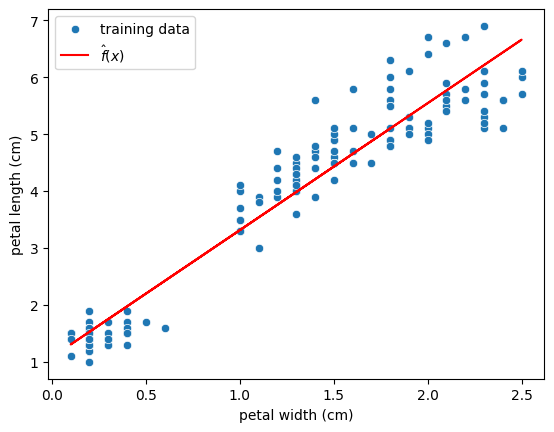

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=df, x='petal width (cm)', y='petal length (cm)', label='training data')

x = df['petal width (cm)'].values.reshape(-1, 1) # we have to call reshape because it's a single feature and sklearn expects a matrix
y = df['petal length (cm)'].values
lr = LinearRegression()
lr.fit(x, y)
print("beta vector: ", [lr.coef_, lr.intercept_])

y_pred = lr.predict(x)
ax.plot(x, y_pred, color='red', label='$\hat{f}(x)$')
ax.legend()

We can also tell seaborn to print the regression line directly

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

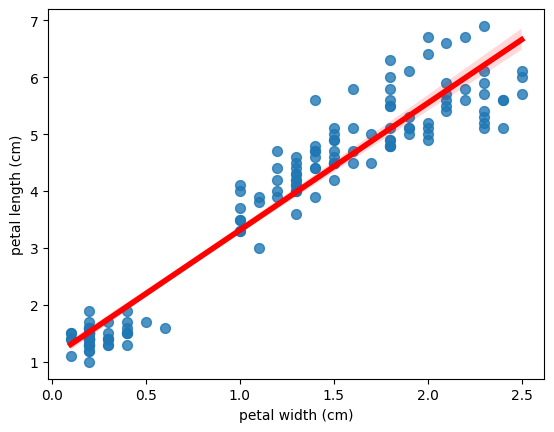

In [19]:
fig, ax = plt.subplots()
sns.regplot(ax=ax, data=df, x='petal width (cm)', y='petal length (cm)', fit_reg=True, line_kws={'color': 'red', 'linewidth': 4}, scatter_kws={'s': 50, 'color': 'green'})

Let's see how well our regression model performs

In [5]:
from sklearn.metrics import r2_score
print('Prediction quality: ', r2_score(y, y_pred))

Prediction quality:  0.9271098389904927
